In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns 
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Data Source https://www.kaggle.com/c/word2vec-nlp-tutorial/data
df=pd.read_csv('labeledTrainData.tsv', sep='\t')

In [3]:
## 1. Get the stemmed data
# Checking header
df.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [4]:
# Setting X to the review column
X = df.loc[:,"review"]

In [5]:
# Checking header of X
X.head()

0    With all this stuff going down at the moment w...
1    \The Classic War of the Worlds\" by Timothy Hi...
2    The film starts with a manager (Nicholas Bell)...
3    It must be assumed that those who praised this...
4    Superbly trashy and wondrously unpretentious 8...
Name: review, dtype: object

In [6]:
# Setting Y to the sentiment column
y = df.loc[:,"sentiment"]

In [7]:
# Checking header of y
y.head()

0    1
1    1
2    0
3    0
4    1
Name: sentiment, dtype: int64

In [8]:
## 2. Split this into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
# Check shape of X_train
X_train.shape

(20000,)

In [10]:
# Check shape of y_train
y_train.shape

(20000,)

In [11]:
# Check shape of X_test
X_test.shape

(5000,)

In [12]:
# Check shape of just X
X.shape

(25000,)

In [13]:
## 3. Fit and apply the tf-idf vectorization to the training set
vectorizer = TfidfVectorizer()

In [14]:
# Setting Xfit to vectorizer.fit_transform 
Xfit = vectorizer.fit_transform(X_train)

In [15]:
# Check type of what is Xfit
type(Xfit)

scipy.sparse.csr.csr_matrix

In [16]:
# Check shape of Xfit
Xfit.shape

(20000, 68399)

In [17]:
## 4. Apply but DO NOT FIT the tf-idf vectorization to the test set
X_test_transform = vectorizer.transform(X_test)

In [18]:
# Check shape of X_test_transform
X_test_transform.shape

(5000, 68399)

In [19]:
## 5. Train a logistic regression using the training data.
clf = LogisticRegression().fit(Xfit, y_train)

In [20]:
## 6. Find the model accuracy on test set.
clf.score(X_test_transform, y_test)

0.8816

In [21]:
# Setting y_pred from using the X_test_transform
y_pred = clf.predict(X_test_transform)

In [22]:
## 7. Create a confusion matrix for the test set predictions
confusion_matrix(y_test, y_pred)

array([[2197,  339],
       [ 253, 2211]], dtype=int64)

In [23]:
## 8. Get the precision, recall, and F1-score for the test set predictions.
precision, recall, f1score , _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

In [24]:
## Printing out and rounding 2 sig figs of Precision, Recall, and F1-score
print(f"Precision: {round(precision,2)} , Recall: {round(recall,2)} , F1-score: {round(f1score,2)} ")

Precision: 0.87 , Recall: 0.9 , F1-score: 0.88 


[Text(0.5, 0, 'False Positive'), Text(0, 0.5, 'True Positive')]

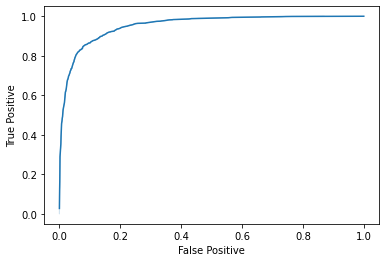

In [25]:
## 9. Create a ROC curve for the test set.
roc = roc_curve(y_test, clf.predict_proba(X_test_transform)[:,1])
ax = sns.lineplot(x=roc[0], y=roc[1])
ax.set(xlabel='False Positive', ylabel='True Positive')

In [26]:
# Get prediction probability of True positives and False Positives
clf.predict_proba(X_test_transform)[0]

array([0.98338049, 0.01661951])